In [2]:
%pylab inline --no-import-all
plt.rc('font', family='serif', serif='Times',size=15)
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=20)
plt.rc('xtick.major', size=10)
plt.rc('ytick.major', size=10)
plt.rc('ytick', labelsize=20)
plt.rc('axes', labelsize=20)
plt.rc('figure',titlesize=25)
plt.rcParams['image.origin'] = 'lower'
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['axes.linewidth'] = 2.

import logging as log
from crispy.tools.initLogger import getLogger
log = getLogger('crispy')

from astropy.io import fits


Populating the interactive namespace from numpy and matplotlib


In [2]:
haystacks_fname = "/Users/mrizzo/Downloads/cube_zodi10inc0dist8_epoch25.7300_sres300.000_0.5um.fits"
cube = fits.open(haystacks_fname)[0].data
hdr = fits.open(haystacks_fname)[0].header
wavel = fits.open(haystacks_fname)[1].data
hdr

SIMPLE  =                    T / Written by IDL:  Wed Feb 28 14:46:45 2018      
BITPIX  =                  -64 / Number of bits per data pixel                  
NAXIS   =                    3 / Number of data axes                            
NAXIS1  =                  401 /                                                
NAXIS2  =                  401 /                                                
NAXIS3  =                  185 /                                                
EXTEND  =                    T / FITS data may contain extensions               
DATE    = '2018-02-28'         / Creation UTC (CCCC-MM-DD) date of FITS header  
SUN     =                    F / Sun in central pixel                           
LOCAL   =                    F / Local zodiacal background added                
COMMENT Spectral image cube of the Solar System.                                
COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
COMMENT and Astrophysics', v

In [3]:
wavel

array([ 0.47999999,  0.48231   ,  0.48461998,  0.48692998,  0.48923999,
        0.49155   ,  0.49385998,  0.49616998,  0.49847999,  0.50079   ,
        0.50309998,  0.50541002,  0.50771999,  0.51002997,  0.51234001,
        0.51464999,  0.51695997,  0.51927   ,  0.52157998,  0.52389002,
        0.5262    ,  0.52850997,  0.53082001,  0.53312999,  0.53543997,
        0.53775001,  0.54005998,  0.54236996,  0.54468   ,  0.54698998,
        0.54930001,  0.55160999,  0.55391997,  0.55623001,  0.55853999,
        0.56085002,  0.56316   ,  0.56546998,  0.56778002,  0.57009   ,
        0.57239997,  0.57471001,  0.57701999,  0.57932997,  0.58164001,
        0.58394998,  0.58626002,  0.58857   ,  0.59087998,  0.59319001,
        0.59549999,  0.59780997,  0.60012001,  0.60242999,  0.60474002,
        0.60705   ,  0.60935998,  0.61167002,  0.61398   ,  0.61628997,
        0.61860001,  0.62090999,  0.62321997,  0.62553   ,  0.62783998,
        0.63014996,  0.63246   ,  0.63476998,  0.63708001,  0.63

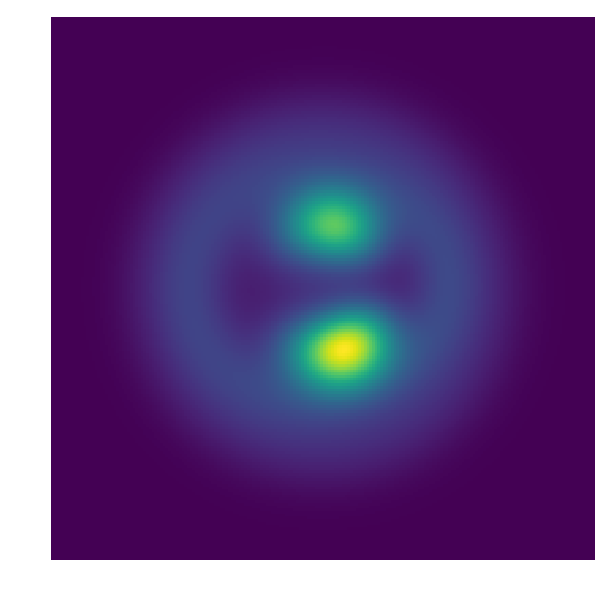

In [4]:
dust_fname = "/Users/mrizzo/Downloads/dust_zodi10inc0dist8_sres300.000_epoch25.7300_0.5um_scl.fits"
dust = fits.open(dust_fname)[0].data
ndust=dust
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(ndust[0,100:-100,100:-100])

In [5]:
from crispy.tools.detutils import frebin

In [6]:
newdust = np.zeros((ndust.shape[0],ndust.shape[1]//2,ndust.shape[2]/2))
for i in range(ndust.shape[0]):
    newdust[i] = frebin(ndust[i],(ndust.shape[1]//2,ndust.shape[2]/2))
    

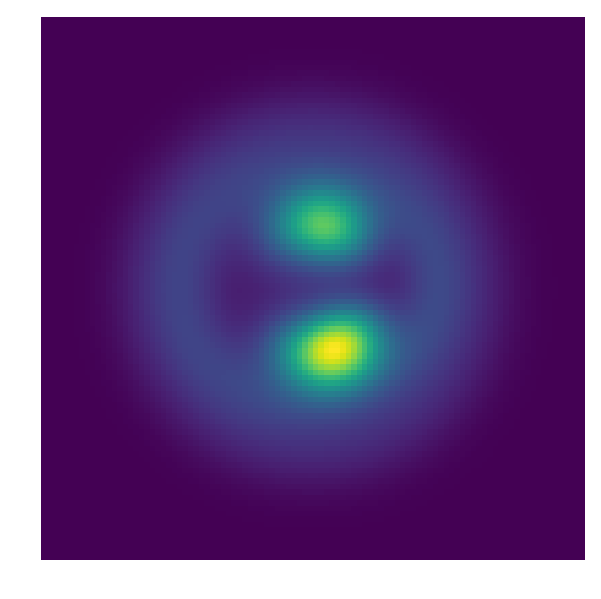

In [7]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(newdust[0,50:-50,50:-50])

# Star

209.637480696 Jy
[ 175.31885157  176.69920776  178.06578386  179.41857315  180.7574548
  182.08244102  183.39342958  184.690389    185.97329639  187.24210656
  188.49678261  189.73735679  190.96371634  192.17590886  193.37395842
  194.55777501  195.72739703  196.88286917  198.02415241  199.15133387
  200.26426836  201.36314425  202.44788815  203.51858042  204.57521841
  205.61784889  206.64650907  207.66121233  208.66206315  209.64902719
  210.6222459   211.58169438  212.52742346  213.45955748  214.3780713
  215.28311001  216.17467047  217.05282232  217.91767865  218.76923471
  219.60762304  220.43289872  221.2451202   222.04437495  222.83072714
  223.60426925  224.36508316  225.11322806  225.84876615  226.57186033
  227.28251513  227.98082399  228.66692939  229.34084412  230.00271352
  230.65259016  231.29055243  231.91674813  232.53119042  233.13402917
  233.72532588  234.30518755  234.87368977  235.43093089  235.97700998
  236.51199615  237.03602094  237.54915518  238.05148146  238.

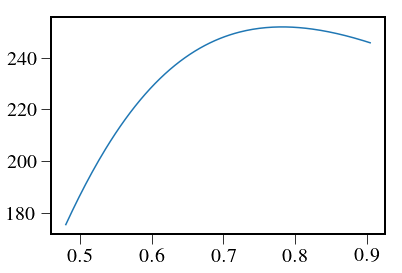

In [8]:
import astropy.constants as c
import astropy.units as u
from astropy.modeling.blackbody import blackbody_lambda,blackbody_nu

star_T = 6520*u.K
star_Vmag = 3.19
# star_T = 5800*u.K
# star_Vmag = 3.5
lambda_cent = np.arange(500,600)*u.nm

# this is the flux density per steradian (specific intensity) you would expect from Vband
flux_bb_F550 = np.mean(blackbody_nu(lambda_cent, star_T).to(u.Watt/u.m**2/u.Hz/u.sr))

# this is the actual flux density received in Vband
Vband_zero_pt = (3636*u.Jansky).to(u.Watt/u.m**2/u.Hertz)
#Vband_zero_pt *= np.mean((c.c/lambda_cent**2))
flux_star_Vband = Vband_zero_pt*10**(-0.4*star_Vmag)*209./192.

print flux_star_Vband.to(u.Jy)

ratio_star = (flux_star_Vband/flux_bb_F550)

star_flux = blackbody_nu(wavel*u.um, star_T).to(u.Watt/u.m**2/u.Hz/u.sr)/flux_bb_F550*flux_star_Vband.to(u.Jy)
print star_flux
plt.plot(wavel,star_flux)

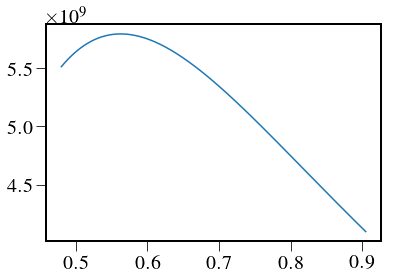

In [9]:
dlam = (wavel[1]-wavel[0])*u.um
Eph = (c.h*c.c/(wavel*u.um)/u.photon).to(u.J/u.photon)
sf = star_flux.to(u.Watt/u.m**2/u.Hz)
sf *= c.c/(wavel*u.um)**2
sf = sf.to(u.W/u.m**2/u.um)
star = (sf/Eph).to(u.photon/u.s/u.m**2/u.um)
plt.plot(wavel,star)

In [10]:
bandpass_beg = (np.array([480, 546, 628, 703, 860])* u.nm).to(u.um)
bandpass_end = (np.array([532, 604, 694, 739, 906])* u.nm).to(u.um)
sf=star_flux.to(u.Watt/u.m**2/u.Hz)
dnu = (c.c/bandpass_beg[0]).to(u.Hz) - (c.c/bandpass_end[0]).to(u.Hz)
f = np.mean(sf[(wavel>bandpass_beg[0].value)*(wavel<bandpass_end[0].value)])
Eph = np.mean(c.h*c.c/(wavel[(wavel>bandpass_beg[0].value)*(wavel<bandpass_end[0].value)]*u.um)).to(u.J)/u.photon
phots = f*dnu/Eph
print phots
print star*0.05,np.sum(star[(wavel>bandpass_beg[0].value)*(wavel<bandpass_end[0].value)]*dlam)

295647401.625 ph W / (J m2)
[  2.75614038e+08   2.76453627e+08   2.77263787e+08   2.78044864e+08
   2.78797104e+08   2.79520933e+08   2.80216627e+08   2.80884517e+08
   2.81524932e+08   2.82138147e+08   2.82724631e+08   2.83284593e+08
   2.83818403e+08   2.84326395e+08   2.84808959e+08   2.85266372e+08
   2.85698955e+08   2.86107094e+08   2.86491171e+08   2.86851442e+08
   2.87188223e+08   2.87501912e+08   2.87792829e+08   2.88061318e+08
   2.88307677e+08   2.88532244e+08   2.88735417e+08   2.88917437e+08
   2.89078647e+08   2.89219419e+08   2.89340089e+08   2.89440931e+08
   2.89522240e+08   2.89584381e+08   2.89627659e+08   2.89652448e+08
   2.89658971e+08   2.89647550e+08   2.89618529e+08   2.89572155e+08
   2.89508812e+08   2.89428706e+08   2.89332215e+08   2.89219623e+08
   2.89091156e+08   2.88947179e+08   2.88787870e+08   2.88613641e+08
   2.88424663e+08   2.88221332e+08   2.88003807e+08   2.87772396e+08
   2.87527391e+08   2.87269020e+08   2.86997581e+08   2.86713288e+08
   2.8

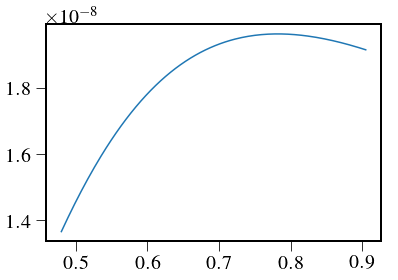

In [11]:
newdust.shape
plt.plot(wavel,newdust[:,newdust.shape[1]//2-1,newdust.shape[2]//2-1])
newdust[:,newdust.shape[1]//2-1,newdust.shape[2]//2-1] += star_flux.value

# planet

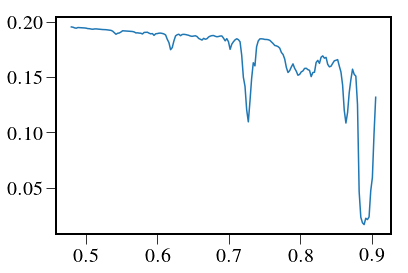

In [12]:
spectrum_fname = '/Users/mrizzo/IFS/crispy/crispy/Inputs/Jupiter_1x_2AU_90deg.dat'
load_albedo = np.loadtxt(spectrum_fname)
from scipy.interpolate import interp1d
albedo = interp1d(load_albedo[:,0],load_albedo[:,1])
plt.plot(wavel,albedo(wavel))

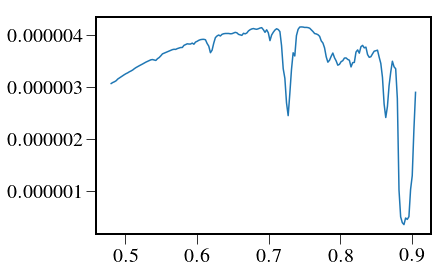

In [13]:
spectrum = albedo(wavel)*star_flux*(1*c.R_jup.to(u.m)/(1.6*u.AU).to(u.m))**2
plt.plot(wavel,spectrum)

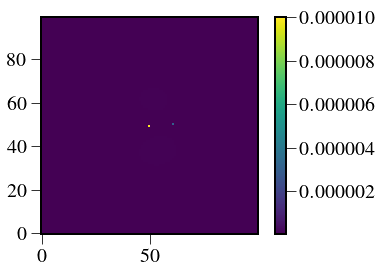

In [14]:
newdust[:,newdust.shape[1]//2,newdust.shape[2]//2+10] += spectrum.value
plt.imshow(newdust[0,50:-50,50:-50],vmax=1e-5)
plt.colorbar()

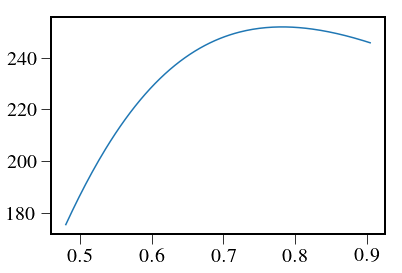

In [15]:
from crispy.tools.inputScene import Jy_to_photons
cube = Jy_to_photons(newdust,wavel)
plt.plot(wavel,newdust[:,newdust.shape[1]//2-1,newdust.shape[2]//2-1])

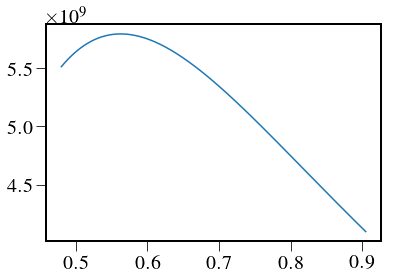

In [16]:
calcstar = cube[:,newdust.shape[1]//2-1,newdust.shape[2]//2-1]
plt.plot(wavel,calcstar)

[ 96.66225703  96.82706886  96.80285371  96.93749569  97.50147766
  97.71196225  97.92675348  98.10821761  98.25992295  98.37694367
  98.38728595  98.53974942  98.5544314   98.65100795  98.95296814
  99.13633858  99.22660374  99.29445756  99.33291048  99.38543947
  99.48241038  99.53971541  99.5312571   99.56386538  99.49931468
  99.21015243  98.57738632  97.8936109   98.41403311  98.59438554
  99.09110467  99.70606859  99.66611776  99.60903828  99.52864401
  99.55880661  99.52104864  99.42775556  99.22043129  98.75316028
  98.76401648  98.6145739   98.51614051  98.13189272  98.80397079
  98.80930648  98.79565016  98.29759041  97.92142036  97.98470808
  97.06402636  97.73594627  97.73759736  97.84370007  97.7722551
  97.52872135  97.19008732  96.61567888  94.50618502  92.88365292
  89.48453541  90.32689108  93.24242871  95.45617121  95.87962616
  95.97586629  95.16674241  95.57407411  95.49699136  95.26948981
  94.94472456  94.59358937  94.12554444  93.82933465  93.81370855
  93.756516

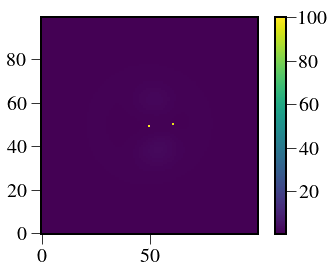

In [17]:
plt.imshow(cube[0,50:-50,50:-50].value,vmax=100)
plt.colorbar()
print cube[:,newdust.shape[1]//2,newdust.shape[2]//2+10]

In [18]:
cube*=dlam

In [19]:
np.sum(cube[-20:,newdust.shape[1]//2,newdust.shape[2]//2+10])
np.sum(cube[(wavel>0.86)*(wavel<0.906),newdust.shape[1]//2,newdust.shape[2]//2+10],axis=0)*3.68

<Quantity 5.618895512227971 ph / (m2 s)>

# Cut the cube in corresponding slices

(185, 200, 200)


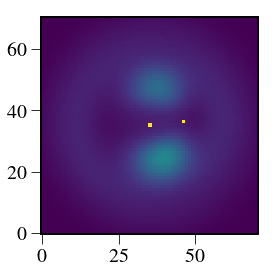

In [20]:
print cube.shape
wavelens = (np.array([506, 575, 661, 721, 883]) * u.nm).to(u.um) # from IPAC instrument parameter db  
bandpass_beg = (np.array([480, 546, 628, 703, 860])* u.nm).to(u.um)
bandpass_end = (np.array([532, 604, 694, 739, 906])* u.nm).to(u.um)
size = 71
final_cube = np.zeros((len(wavelens),cube.shape[1],cube.shape[2]))
for i in range(len(wavelens)):
    final_cube[i] = np.sum(cube[(wavel>bandpass_beg[i].value)*(wavel<bandpass_end[i].value),:,:],axis=0)

final_cube = 3.683*final_cube[:,(cube.shape[1]-size)//2:(cube.shape[1]-size)//2+size,(cube.shape[2]-size)//2:(cube.shape[2]-size)//2+size]

plt.imshow(final_cube[0],vmax=1)



In [21]:
out = fits.HDUList(fits.PrimaryHDU(final_cube))
out.writeto("/Users/mrizzo/IFS/crispy/crispy/Inputs/BertrandCube.fits.gz", overwrite=True)


In [22]:
for i in range(len(wavelens)):
    print wavel[(wavel>bandpass_beg[i].value)*(wavel<bandpass_end[i].value)]
    print dlam*len(wavel[(wavel>bandpass_beg[i].value)*(wavel<bandpass_end[i].value)])

[ 0.48231     0.48461998  0.48692998  0.48923999  0.49155     0.49385998
  0.49616998  0.49847999  0.50079     0.50309998  0.50541002  0.50771999
  0.51002997  0.51234001  0.51464999  0.51695997  0.51927     0.52157998
  0.52389002  0.5262      0.52850997  0.53082001]
0.050820171833 um
[ 0.54698998  0.54930001  0.55160999  0.55391997  0.55623001  0.55853999
  0.56085002  0.56316     0.56546998  0.56778002  0.57009     0.57239997
  0.57471001  0.57701999  0.57932997  0.58164001  0.58394998  0.58626002
  0.58857     0.59087998  0.59319001  0.59549999  0.59780997  0.60012001
  0.60242999]
0.0577501952648 um
[ 0.63014996  0.63246     0.63476998  0.63708001  0.63938999  0.64170003
  0.64401001  0.64631999  0.64863002  0.65094     0.65324998  0.65556002
  0.65786999  0.66017997  0.66249001  0.66479999  0.66710997  0.66942
  0.67172998  0.67404002  0.67635     0.67866004  0.68097001  0.68327999
  0.68559003  0.68790001  0.69020998  0.69252002]
0.0646802186966 um
[ 0.70406997  0.70638001  0.70

Text(0,0.5,u'Contrast')

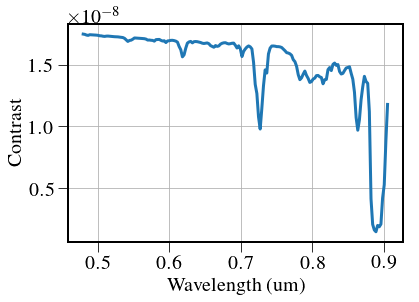

In [29]:
contrast = albedo(wavel)*(1*c.R_jup.to(u.m)/(1.6*u.AU).to(u.m))**2
plt.plot(wavel,contrast,lw=3)
plt.grid('on')
plt.xlabel('Wavelength (um)',fontsize=20)
plt.ylabel('Contrast',fontsize=20)

# Cleaned version

## Load dust

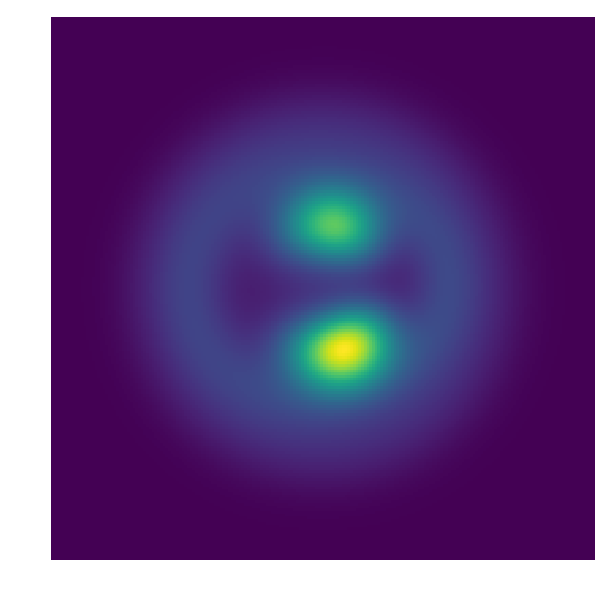

In [3]:
dust_fname = "/Users/mrizzo/Downloads/dust_zodi10inc0dist8_sres300.000_epoch25.7300_0.5um_scl.fits"
dust = fits.open(dust_fname)[0].data
ndust=dust
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(ndust[0,100:-100,100:-100])

## Rotate dust

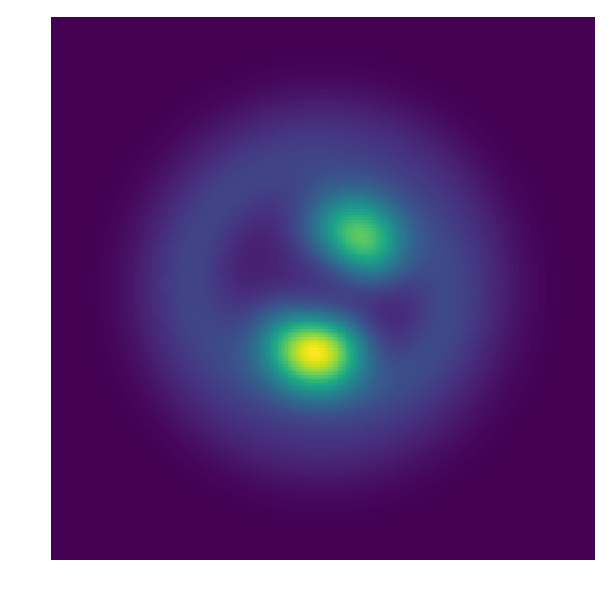

In [6]:
import skimage.transform

rdust = np.array([skimage.transform.rotate(ndust[i], angle = 26,
                           order = 1, resize = False,
                           center=None, cval=0.0) for i in range(len(ndust))])
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(rdust[0,100:-100,100:-100])
plt.colorbar(fraction=0.046, pad=0.04)

## Bin down

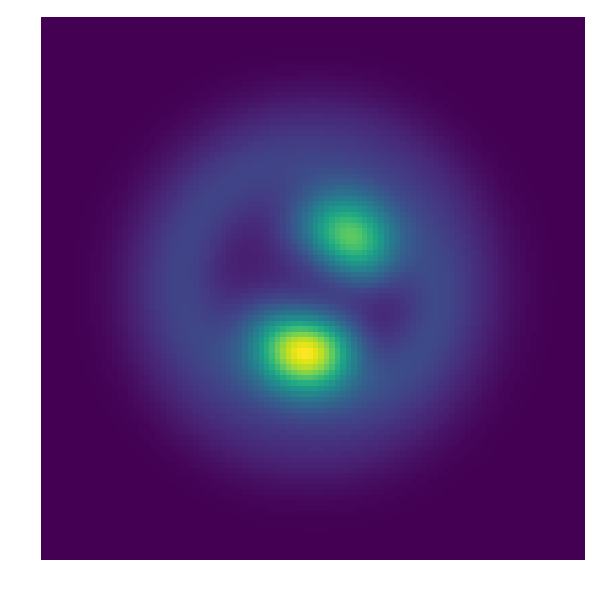

In [147]:
from crispy.tools.detutils import frebin
newdust = np.zeros((ndust.shape[0],ndust.shape[1]//2,ndust.shape[2]/2))
newrdust = np.zeros((ndust.shape[0],ndust.shape[1]//2,ndust.shape[2]/2))
for i in range(ndust.shape[0]):
    newdust[i] = frebin(ndust[i],(ndust.shape[1]//2,ndust.shape[2]/2))
    newrdust[i] = frebin(rdust[i],(rdust.shape[1]//2,rdust.shape[2]/2))
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(newrdust[0,50:-50,50:-50])

## Convert to photons

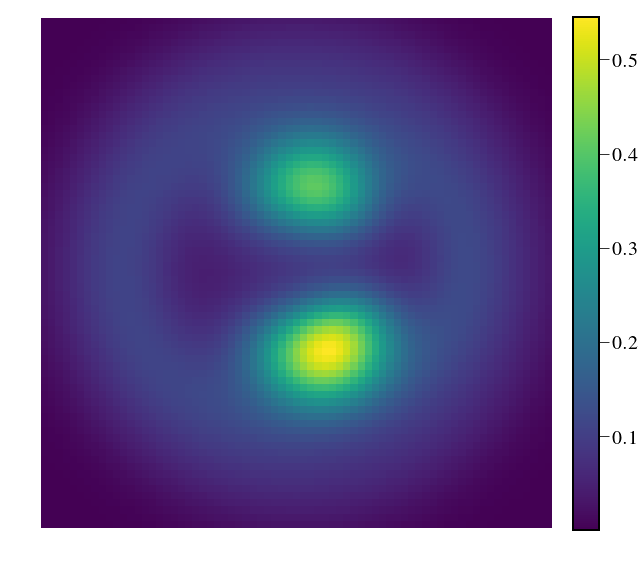

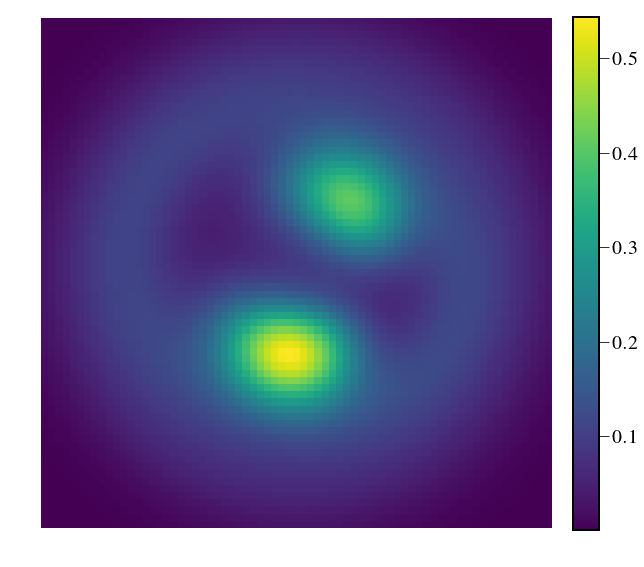

In [299]:
from crispy.tools.inputScene import Jy_to_photons
import astropy.units as u
haystacks_fname = "/Users/mrizzo/Downloads/cube_zodi10inc0dist8_epoch25.7300_sres300.000_0.5um.fits"
wavel = fits.open(haystacks_fname)[1].data
dlam = (wavel[1]-wavel[0])*u.um
ncube = Jy_to_photons(newdust,wavel)*dlam*3.683*u.m**2
rcube = Jy_to_photons(newrdust,wavel)*dlam*3.683*u.m**2

wavelens = (np.array([506, 575, 661, 721, 883]) * u.nm).to(u.um) # from IPAC instrument parameter db  
bandpass_beg = (np.array([480, 546, 628, 703, 860])* u.nm).to(u.um)
bandpass_end = (np.array([532, 604, 694, 739, 906])* u.nm).to(u.um)
size = 71
final_ncube = np.zeros((len(wavelens),ncube.shape[1],ncube.shape[2]))
final_rcube = np.zeros((len(wavelens),rcube.shape[1],rcube.shape[2]))
for i in range(len(wavelens)):
    final_ncube[i] = np.sum(ncube[(wavel>bandpass_beg[i].value)*(wavel<bandpass_end[i].value),:,:],axis=0)
    final_rcube[i] = np.sum(rcube[(wavel>bandpass_beg[i].value)*(wavel<bandpass_end[i].value),:,:],axis=0)

final_ncube = final_ncube[:,(ncube.shape[1]-size)//2:(ncube.shape[1]-size)//2+size,(ncube.shape[2]-size)//2:(ncube.shape[2]-size)//2+size]
final_rcube = final_rcube[:,(rcube.shape[1]-size)//2:(rcube.shape[1]-size)//2+size,(rcube.shape[2]-size)//2:(rcube.shape[2]-size)//2+size]




plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(final_ncube[1])
plt.colorbar(fraction=0.046, pad=0.04)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(final_rcube[1])
plt.colorbar(fraction=0.046, pad=0.04)

In [300]:
print star_photons/np.sum(final_ncube[1])

240724.652342


In [301]:
print 1./240724.652342

4.15412376868e-06


In [302]:
2.4e-8/10./(0.02)**2

5.999999999999999e-06

## Focus on slice 1

In [303]:
nd = final_ncube[1]
rd = final_rcube[1]

star_photons = 1.38e10/120.
contrast = 6e-9
planet_photons = star_photons*contrast
print star_photons,planet_photons


115000000.0 0.69


## Dim the dust down a bit

In fact this needs to account for the CGI losses

In [304]:
nd /= 10.
rd /= 10.


## Add planet

In [305]:
cx = nd.shape[0]//2
nx = 1
ny = 14
nd[cx+nx,cx+ny] += planet_photons
ang = np.arctan(float(nx)/float(ny))*180./np.pi
print cx+nx,cx+ny,ang

36 49 4.08561677997


In [306]:
d = np.sqrt(ny**2+nx**2)
theta = (26.-ang)*np.pi/180.
rx = int(cx+nx*np.cos(theta) - ny*np.sin(theta))
ry = int(cx+nx*np.sin(theta) + ny*np.cos(theta))
print rx,ry
rd[rx,ry] += planet_photons

30 48


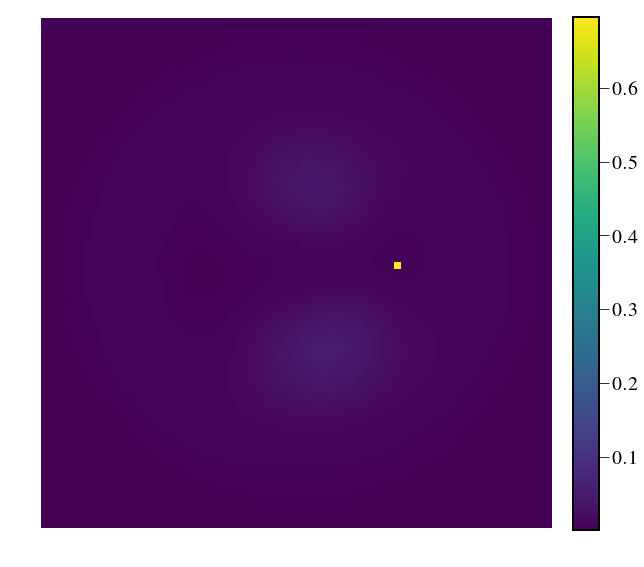

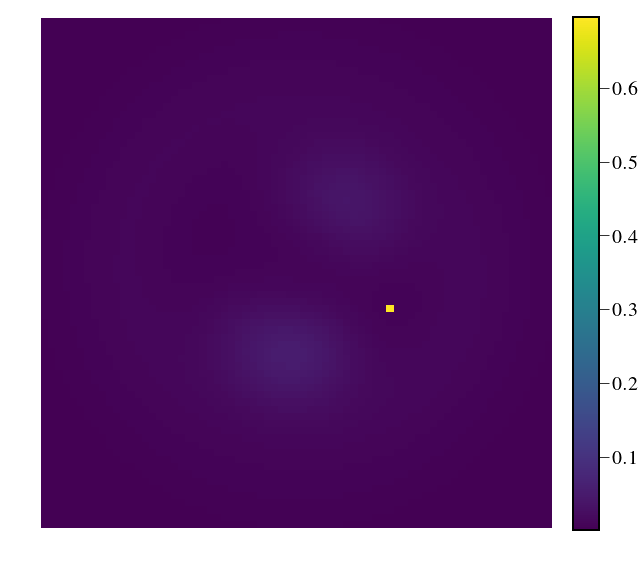

In [307]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(nd)
plt.colorbar(fraction=0.046, pad=0.04)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(rd)
plt.colorbar(fraction=0.046, pad=0.04)

## Add star

In [308]:
nd[cx,cx] += star_photons
rd[cx,cx] += star_photons


## Export

In [309]:
fits.writeto('/Users/mrizzo/IFS/crispy/crispy/Inputs/OS6n.fits.gz',nd,overwrite=True)
fits.writeto('/Users/mrizzo/IFS/crispy/crispy/Inputs/OS6r.fits.gz',rd,overwrite=True)

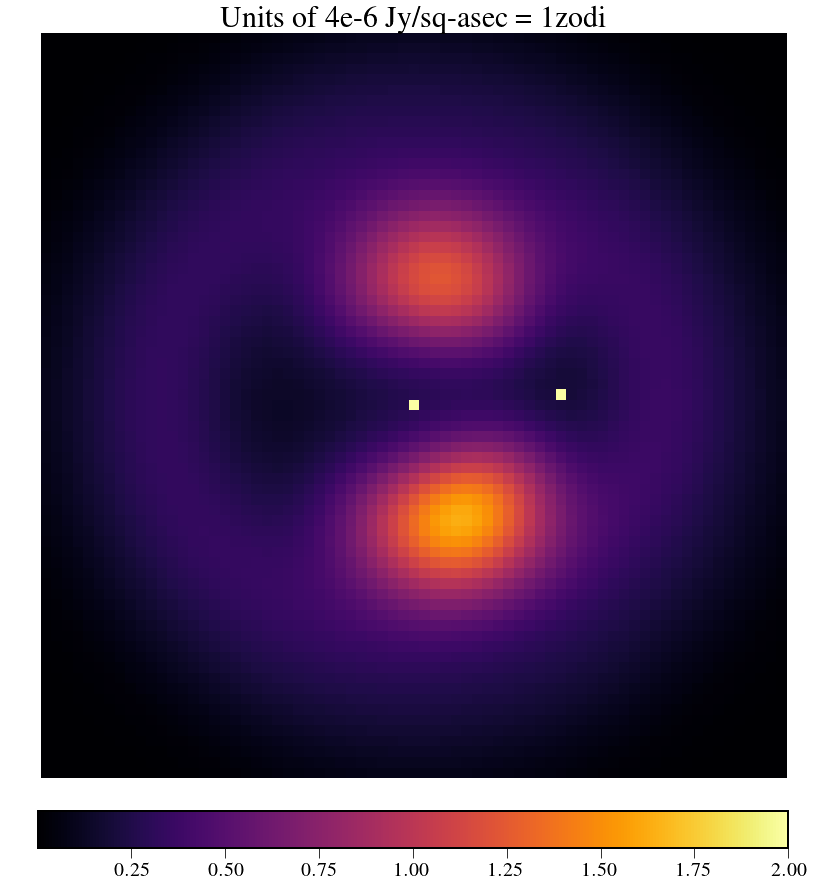

In [317]:
plt.figure(figsize=(15,15))
plt.axis('off')
nd2 = nd.copy()
# nd2[cx,cx] = 0.0
plt.imshow(nd2/0.05*2.4e-9/(0.02**2)/(4e-6),cmap='inferno',vmax = 2)
plt.title('Units of 4e-6 Jy/sq-asec = 1zodi',fontsize=30)
plt.colorbar(orientation='horizontal',fraction=0.046, pad=0.04)


## Add background

In [311]:
stars = fits.getdata('/Users/mrizzo/Science/Haystacks/spectra.fits.gz')
print stars.shape
galaxies = fits.open('/Users/mrizzo/Science/Haystacks/new_backgrounds/GALAXIES_10lat0.566718um.fits')


(10, 64, 45)


In [312]:
size = 400

gal = np.zeros((64,size,size),dtype=float)

random_X = numpy.random.randint(0,3600,stars.shape[-1])
random_Y = numpy.random.randint(0,3600,stars.shape[-1])

# add the stars to all slices in this cube
# gal[:,random_X,random_Y] += stars[3,:,:]

xregion = 2200
yregion = 900

xmin = xregion
xmax = xmin+size
ymin = yregion
ymax = ymin+size

nstars=0
wavel = np.linspace(0.566,0.7,64)
print wavel
for i in range(len(random_X)):
    if random_X[i]>xmin and random_X[i]<xmax and random_Y[i]>ymin and random_Y[i]<ymax:
        nstars+=1
        gal[:,random_X[i]-xmin,random_Y[i]-ymin] = stars[3,:,i]
print nstars

[ 0.566       0.56812698  0.57025397  0.57238095  0.57450794  0.57663492
  0.5787619   0.58088889  0.58301587  0.58514286  0.58726984  0.58939683
  0.59152381  0.59365079  0.59577778  0.59790476  0.60003175  0.60215873
  0.60428571  0.6064127   0.60853968  0.61066667  0.61279365  0.61492063
  0.61704762  0.6191746   0.62130159  0.62342857  0.62555556  0.62768254
  0.62980952  0.63193651  0.63406349  0.63619048  0.63831746  0.64044444
  0.64257143  0.64469841  0.6468254   0.64895238  0.65107937  0.65320635
  0.65533333  0.65746032  0.6595873   0.66171429  0.66384127  0.66596825
  0.66809524  0.67022222  0.67234921  0.67447619  0.67660317  0.67873016
  0.68085714  0.68298413  0.68511111  0.6872381   0.68936508  0.69149206
  0.69361905  0.69574603  0.69787302  0.7       ]
0


In [313]:
print wavel[18]

0.604285714286


In [314]:
for i in range(64):
    gal[i] += galaxies[1+i].data[xregion:xregion+size,yregion:yregion+size]

galphot = Jy_to_photons(gal,wavel)[:18]

In [315]:
meangal = np.mean(galphot,axis=0)*0.57*u.um*0.1
print meangal.unit

ph / (m2 s)


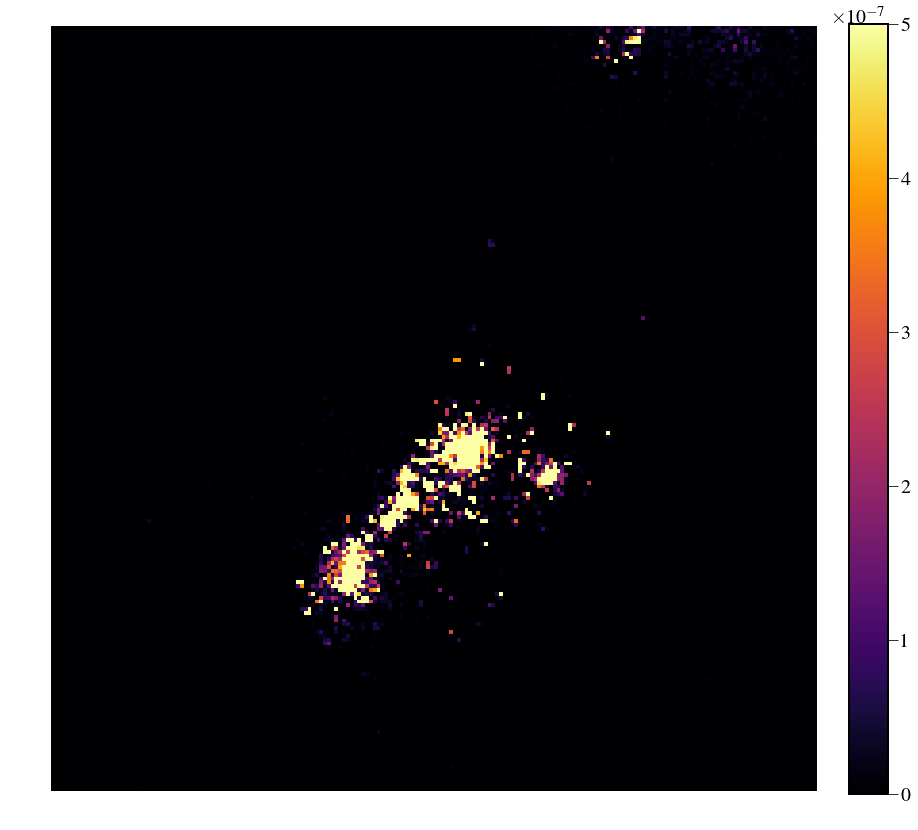

In [316]:
binned_meangal = frebin(meangal,(meangal.shape[0]//2,meangal.shape[1]//2))
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(binned_meangal.value,cmap='inferno',vmax=0.0000005)
plt.colorbar(fraction=0.046, pad=0.04)
fits.writeto('/Users/mrizzo/Downloads/galaxies_test.fits',binned_meangal.value,overwrite=True)